In [1]:
%pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.7 MB/s eta 0:00:00


In [3]:
#Required Libraries
import random
import numpy as np
import math
import matplotlib.pyplot as plt #type: ignore
from deap import base, creator, tools, algorithms #type: ignore

In [5]:
# Pre Requisite Values
num_locations=20

locations=[(random.randint(-100, 100), random.randint(-100, 100)) for _ in range(num_locations)]

depot=(0,0)

num_vehicles=4

print(num_locations)
print(locations)

20
[(87, -49), (14, 44), (78, 33), (-45, -84), (20, -37), (-39, 37), (5, -65), (-36, -67), (91, 19), (-79, 2), (-68, -12), (13, -83), (16, 51), (91, 76), (-12, -9), (-34, 27), (-55, -30), (-90, -60), (12, 14), (65, -87)]


In [6]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)

toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)  #finish defining how to build an individual)
toolbox.register("population",tools.initRepeat,list,toolbox.individual) #finish defining how to build an population)

# print(toolbox.population(100))

In [7]:
# Fitness Function
def evalVRP(individual):
    x,y=depot
    totalDistance=0
    distances=[]
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        totalDistance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return totalDistance, balance_penalty

In [8]:
#Genetic Operators
toolbox.register("evaluate", evalVRP)
toolbox.register("mate",tools.cxPartialyMatched) # Choose and configure a crossover method)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.05) # Choose and configure a mutation method)
toolbox.register("select",tools.selTournament,tournsize=3)

In [9]:
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

In [10]:
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof


gen	nevals	avg    	min    
0  	300   	1129.96	6.75743
1  	213   	1089.07	21.8761
2  	243   	1078.73	14.273 
3  	232   	1067.14	12.5193
4  	233   	1056.21	5.08091
5  	218   	1052.28	24.7533
6  	213   	1028.85	15.0006
7  	233   	1012.49	8.76884
8  	219   	1004.71	15.6042
9  	209   	978.465	7.607  
10 	224   	972.52 	8.05571
11 	230   	978.2  	15.3115
12 	230   	980.774	15.3115
13 	217   	964.152	11.9321
14 	231   	954.425	4.07258
15 	250   	965.266	23.8125
16 	238   	967.76 	8.00587
17 	236   	943.267	10.867 
18 	225   	930.079	10.867 
19 	225   	901.99 	10.867 
20 	209   	885.125	10.867 
21 	232   	892.127	10.867 
22 	237   	871.75 	10.867 
23 	217   	853.803	19.7238
24 	227   	857.845	19.4745
25 	246   	854.133	8.51793
26 	233   	831.204	14.332 
27 	219   	793.673	8.324  
28 	229   	761.103	8.324  
29 	223   	738.71 	1.2138 
30 	238   	717.648	1.2138 
31 	225   	688.143	1.2138 
32 	221   	663.181	1.2138 
33 	243   	635.538	1.2138 
34 	232   	623.127	1.2138 
35 	244   	615.008	1.2138 
3

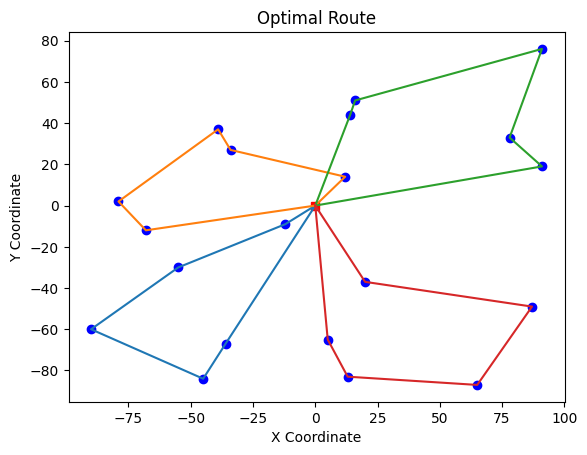

In [11]:
if __name__ == "__main__":
    main()